# Running Elegant with XOPT + Archiving

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
lume_path = ''
sys.path.append(lume_path + 'openPMD-beamphysics')
sys.path.append(lume_path + 'distgen')
sys.path.append(lume_path + 'xopt')
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [2]:
# Import the class
from xopt import Xopt

### Make YAML and Run with Random Inputs

In [11]:
# Make a proper input file. 
YAML="""
xopt: {output_path: output , verbose: true, algorithm: cnsga}

algorithm:
  name: cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant  
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
#    L2_10_50_phase: [30, 70]
    L2_10_25_phase: [30, 60]
#    X_MAX: [0.5e-3, 3.0e-3]
#    DX: [0.9e-3, 1.1e-3]
#    DP: [10.0e-5, 18.0e-5]
  objectives:
    sigma_pz: MINIMIZE
    norm_emit_x: MINIMIZE
#    sigma_t: MINIMIZE
#    ptp_t: MINIMIZE
#    core_pz: MINIMIZE
#    core_current: MAXIMIZE
  constraints:
 #   sigma_pz: [LESS_THAN, 4.0e+6]
    norm_emit_x: [LESS_THAN, 0.6e-6]
    ptp_t: [LESS_THAN, 6.0e-14]
  #  sigma_t: [LESS_THAN, 3.0e-15]
  #  mean_pz: [GREATER_THAN, 6.0e+9]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_25_phase}
  constants: 
#    L1_9_25_phase: 65.108
#    L2_10_25_phase: 57.0
    L3_10_25_volt: 1.6628471874e+7
    L3_10_50_volt: 1.6628471874e+7
    X_MAX: 5.0e-3
    DX: 1.1e-3
    DP: 16.0e-5
    INPUT_FILE: /global/u2/a/aedelen/elegant_example/elegant_particles.txt
    sample_interval: 1000
    ele_fname: LCLS2cuH.ele #Note this will make a new file 'run<elename>.ele' and modify the path_search etc below in that new file
    lte_fname: LCLS2cuH.lte
    ELEGANT_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant
    HDF5_BIN: /global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/epics/extensions/bin/linux-x86_64/sdds2hdf
    path_search: /global/homes/a/aedelen/GitHub/lcls-lattice/elegant, /global/homes/a/aedelen/GitHub/lcls-lattice/elegant/rmat,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/wakefields,/global/homes/a/aedelen/GitHub/lcls-lattice/elegant/beams
    finput_name: HXRSTART.out
    foutput_name: HXRSTART.h5
    H5_SAVE: ./output/beams/  #Note need to make this directory  if does not already exist
  #  timeout: 180
    

"""



In [12]:
!pwd

/global/cscratch1/sd/aedelen/test


In [13]:
X = Xopt(YAML)

Loading config as text


In [14]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/cscratch1/sd/aedelen/test/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_2

## Do one run with random inputs

In [15]:
X.random_evaluate()

{'sigma_pz': 44623002.70134971,
 'norm_emit_x': 1.2434978509545226e-06,
 'sigma_t': 1.1698960586956658e-13,
 'mean_pz': 5849628910.76647,
 'charge': 1.4955e-10,
 'ptp_t': 5.213897220665933e-13,
 'core_norm_emit_x': 3.210192508160011e-07,
 'core_pz': 1261041.7978625628,
 'core_current': 639.8512893685341,
 'archive': './output/beams/elegant_sim_441a16bb02de1015b84d09fee524639e.h5'}

In [16]:
X


            Xopt 
________________________________           
Version: 0.4.1
Configured: True
Config as YAML:
xopt: {output_path: /global/cscratch1/sd/aedelen/test/output, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 3, population_size: 16, crossover_probability: 0.9, mutation_probability: 1.0,
    selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: test_elegant
  evaluate: run_elegant.evaluate_elegant
  options: {a: 1}
vocs:
  name: Elegant_test
  description: null
  simulation: test_elegant
  templates: null
  variables:
    L1_9_50_phase: [30, 70]
    L1_9_25_phase: [50, 80]
    L1_10_25_phase: [30, 70]
    X1_Xband_phase: [-120, -50]
    L2_10_25_phase: [30, 60]
  objectives: {sigma_pz: MINIMIZE, norm_emit_x: MINIMIZE}
  constraints:
    norm_emit_x: [LESS_THAN, 6.0e-07]
    ptp_t: [LESS_THAN, 6.0e-14]
    charge: [GREATER_THAN, 5.0e-11]
  linked_variables: {L2_10_50_phase: L2_10_2

## Run GA

In [17]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [18]:
# Change max generations
X.algorithm['options']['max_generations'] = 3
X.run(executor=executor)

Starting at time 2020-11-11T16:38:36-08:00



 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm
Version 0.4.1

Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 5 variables, 3 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'DP': 0.00016,
               'DX': 0.0011,
               'ELEGANT_BIN': '/global/cfs/cdirs/m669/aliaksei/elegant2020_rhel7/oag/apps/bin/linux-x86_64/elegant',
               'H5_SAVE': './output/

In [19]:
#settings = {'L1_10_25_phase': 48.10988000636041,
#'L1_9_25_phase': 7.722087823054991,
#'L1_9_50_phase': -34.63546794399416,
#'L2_10_50_phase': -49.99535063902283,
#'X1_Xband_phase': 97.87343465656124,
#'L2_10_25_phase': 55.5}

In [20]:
#X.evaluate(settings)

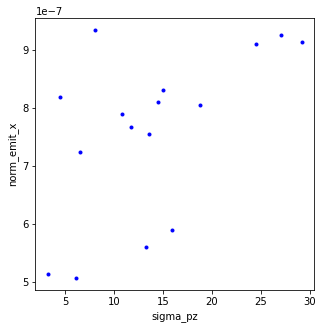

In [21]:
# Extract objectives from output
import numpy as np
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.population['outputs']]
y = [o[key2] for o in X.population['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(x, y, color='blue')
ax.plot(np.asarray(x)/1.0e6, np.asarray(y),'.', color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

## Load Data from Json

In [22]:
from xopt.dataset import load_all_xopt_data

In [23]:
from glob import glob
jlist = glob('output/gen*json')
jlist

['output/gen_1.json', 'output/gen_3.json', 'output/gen_2.json']

In [24]:
DAT = load_all_xopt_data(jlist)


In [25]:
DAT

,L1_10_25_phase,L1_9_25_phase,L1_9_50_phase,L2_10_25_phase,X1_Xband_phase,L3_10_25_volt,L3_10_50_volt,X_MAX,DX,DP,...,sigma_pz,norm_emit_x,sigma_t,mean_pz,charge,ptp_t,core_norm_emit_x,core_pz,core_current,archive
0,39.544000,72.641338,34.227899,32.028314,-99.914467,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31.077105,73.523954,58.078788,35.954440,-74.367866,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.354670e+07,7.547061e-07,6.585518e-14,4.605134e+09,1.327500e-10,3.255689e-13,5.151555e-07,2.612370e+06,873.520673,./output/beams/elegant_sim_7f2f50f2f538eee4455...
2,56.605936,78.770398,36.310158,57.856479,-71.173106,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.251813e+06,5.142166e-07,8.442547e-14,6.112245e+09,1.305000e-10,3.188788e-13,3.848251e-07,1.528971e+06,577.755072,./output/beams/elegant_sim_b46ede14b1619e7d315...
3,69.739104,60.618677,51.515695,44.018712,-77.694269,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.313205e+07,1.101238e-06,5.550738e-14,5.236609e+09,1.405500e-10,2.980115e-13,6.773895e-07,2.721095e+06,959.815802,./output/beams/elegant_sim_69173dbd3dd510f128b...
4,36.334334,78.572412,49.582400,36.398527,-85.137596,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.244585e+07,1.086314e-06,9.823718e-14,4.639875e+09,1.404000e-10,5.179341e-13,6.317369e-07,1.521422e+06,681.703969,./output/beams/elegant_sim_ea72e411f0aeab762a6...
5,69.899969,50.296842,49.386383,36.475945,-81.443446,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,9.816517e+06,1.617902e-06,5.713861e-14,4.649524e+09,1.387500e-10,3.283368e-13,1.430008e-06,2.098922e+06,1208.500885,./output/beams/elegant_sim_c2c5d727e19b0e858a0...
6,52.026089,78.770398,36.196318,57.551196,-62.521505,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,1.593649e+07,5.895792e-07,6.810754e-14,6.096110e+09,1.188000e-10,2.547846e-13,3.948535e-07,1.958840e+06,652.022807,./output/beams/elegant_sim_1927b385b0a82e859fa...
7,50.703262,67.730995,33.872376,51.269802,-70.942023,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.920007e+07,9.138246e-07,4.065771e-14,5.718823e+09,1.198500e-10,1.584401e-13,3.702423e-07,4.304182e+06,1169.692728,./output/beams/elegant_sim_24883966a82044b9dab...
8,60.798980,70.050204,56.133042,34.542321,-56.699154,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,2.451028e+07,9.087454e-07,2.508980e-13,4.505003e+09,1.281000e-10,9.604100e-13,4.123869e-07,8.389117e+05,206.861058,./output/beams/elegant_sim_427e47cb4d18da9a1e5...
9,37.477782,63.507206,35.361636,53.538751,-77.662082,1.662847e+07,1.662847e+07,0.005,0.0011,0.00016,...,3.007976e+07,5.884272e-06,8.526090e-15,5.836598e+09,1.189500e-10,5.439201e-14,1.590217e-06,1.972837e+07,7312.228257,./output/beams/elegant_sim_3df96af7105cfa3a710...


In [26]:
#see archive file list --> particle distributions

In [27]:
DAT['archive']

0                                                   NaN
1     ./output/beams/elegant_sim_7f2f50f2f538eee4455...
2     ./output/beams/elegant_sim_b46ede14b1619e7d315...
3     ./output/beams/elegant_sim_69173dbd3dd510f128b...
4     ./output/beams/elegant_sim_ea72e411f0aeab762a6...
5     ./output/beams/elegant_sim_c2c5d727e19b0e858a0...
6     ./output/beams/elegant_sim_1927b385b0a82e859fa...
7     ./output/beams/elegant_sim_24883966a82044b9dab...
8     ./output/beams/elegant_sim_427e47cb4d18da9a1e5...
9     ./output/beams/elegant_sim_3df96af7105cfa3a710...
10    ./output/beams/elegant_sim_fec802c2377b115470c...
11    ./output/beams/elegant_sim_f0887fa2182ffdb39bd...
12    ./output/beams/elegant_sim_122670705151daea467...
13    ./output/beams/elegant_sim_ee2edd54b1949911696...
14    ./output/beams/elegant_sim_cabf57277830c00ec4e...
15    ./output/beams/elegant_sim_4a8e5ebf8778f486142...
16    ./output/beams/elegant_sim_a6f06686d232366740e...
17    ./output/beams/elegant_sim_448112f1abc983a

In [28]:
last_file_idx=len(DAT)-1
DAT['archive'][last_file_idx] #look at last archive file

'./output/beams/elegant_sim_1b75953399ffa2b71d3b813587019009.h5'

## Load Particle Distribution

In [29]:
from pmd_beamphysics import ParticleGroup
from h5py import File
import h5py

In [30]:
with h5py.File(DAT['archive'][last_file_idx], 'r') as h5:
    print(list(h5.attrs))

['basePath', 'chargeUnitSI', 'dataType', 'numParticles', 'openPMD', 'openPMDextension', 'particlesPath', 'speciesType', 'totalCharge']


In [31]:
# This will convert to a data dict
P = ParticleGroup(DAT['archive'][last_file_idx])
P

<ParticleGroup with 899 particles at 0x2aaad5fb5eb0>

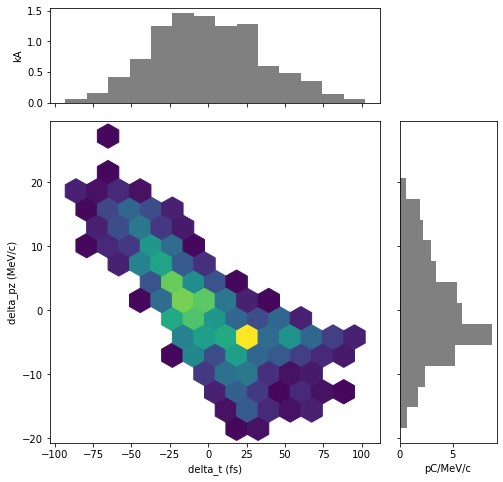

In [32]:
P.plot('delta_t', 'delta_pz', figsize=(8,8))

In [33]:
P['mean_energy'], P.units('mean_energy')

(4602748733.009527, pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

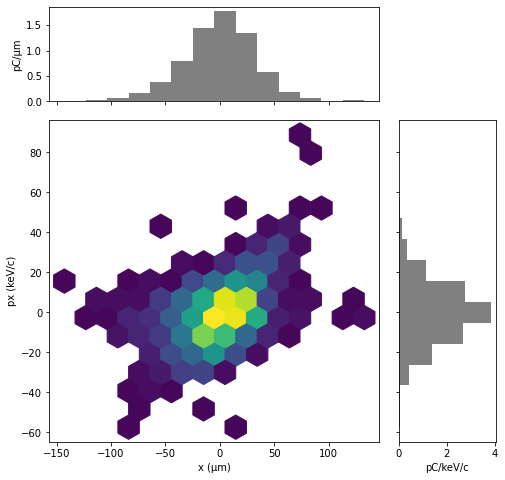

In [34]:
P.plot('x', 'px', figsize=(8,8))

In [35]:
P2=P.where(P.x < P['mean_x'])

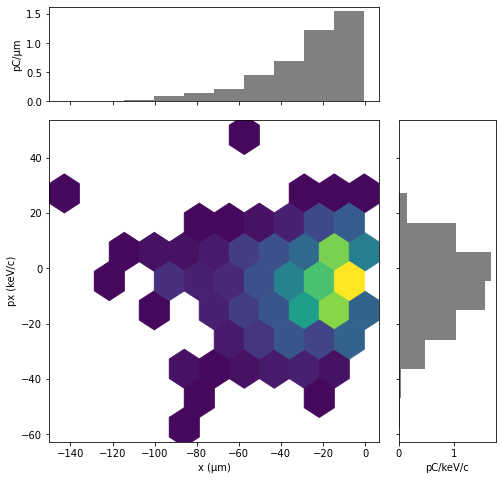

In [36]:
P2.plot('x', 'px', figsize=(8,8))